[This notebook is taken from this repo and changed for our class](https://github.com/mGalarnyk/Python_Tutorials)

# Logistic Regression


## Objectives

- To be able to use sklearn for logistic regression problems. 

- After a model fit to be able to print confusion matrices with seaborn and matplotblib.

- Understanding parameters of LogisticRegression in sklearn.

## Loading the Data (Digits Dataset) 

The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

Now that you have the dataset loaded you can use the commands below

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [4]:
digits.data[2].shape

(64,)

## Showing the Images and Labels (Digits Dataset)

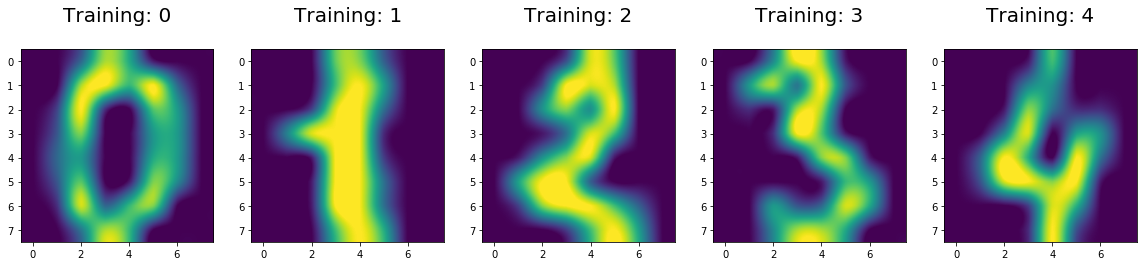

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), interpolation = 'spline16')
    plt.title('Training: %i\n' % label, fontsize = 20)

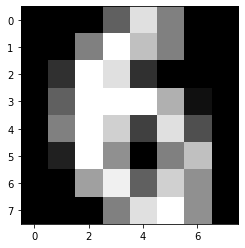

In [7]:
plt.imshow(np.reshape(digits.data[481], (8, 8)), cmap=plt.cm.gray)

In [8]:
digits.data[481]

array([ 0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  8., 16., 12.,
        8.,  0.,  0.,  0.,  3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  6.,
       16., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 13.,  4., 14.,  5.,
        0.,  0.,  2., 16.,  9.,  0.,  8., 12.,  0.,  0.,  0., 10., 15.,
        6., 13.,  9.,  0.,  0.,  0.,  0.,  8., 14., 16.,  9.,  0.])

## Splitting Data into Training and Test Sets (Digits Dataset)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, 
                                                    test_size=0.20, 
                                                    stratify =digits.target, 
                                                    random_state=0)

## Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [10]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model

In [11]:
logisticRegr = LogisticRegression(max_iter=1000,
                                  penalty = 'l2', 
                                  solver = "lbfgs",
                                  tol = 0.001, 
                                  class_weight= None, 
                                  n_jobs = 2,
                                  verbose= 1)

In [12]:
logisticRegr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=1,
                   warm_start=False)

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [13]:
logisticRegr.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=1,
                   warm_start=False)

**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

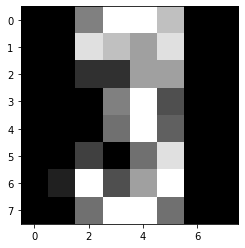

In [14]:
# Let's take a look at the first image in our training set

plt.imshow(np.reshape(x_train[0], (8, 8)), cmap=plt.cm.gray)
plt.draw()

In [15]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_train[123].reshape(1,-1))

array([3])

In [18]:
## we can see the probability predictions corresponding to each class
# np.set_printoptions(precision = 2, suppress = False)
logisticRegr.predict_proba(x_train[123].reshape(1,-1))

array([[6.07e-13, 5.63e-11, 9.66e-11, 9.97e-01, 5.20e-19, 1.07e-04,
        3.77e-15, 2.49e-14, 1.96e-07, 2.86e-03]])

In [39]:
x_train[0].reshape(1, -1).shape

(1, 64)

In [40]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_train[0:10])

array([3, 9, 1, 3, 1, 9, 4, 4, 2, 8])

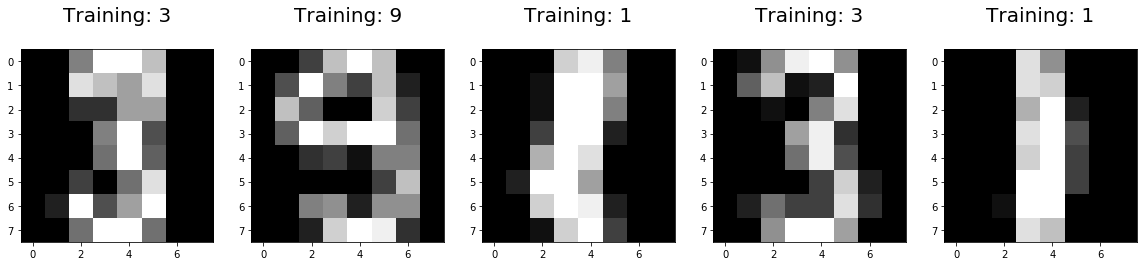

In [41]:
## Let's take a look at the cases above

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [42]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_train)

## Measuring Model Performance (Digits Dataset)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as: 

$$Accuracy =  \frac{\mbox{# of Correct Predictions}}{\mbox{# of Total Predictions}} $$

In [43]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_train, y_train)
print(score)

1.0


### Confusion Matrix (Digits Dataset)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrixes. 

In [44]:
import numpy as np 

import seaborn as sns
from sklearn import metrics

**Method 1 (Seaborn)**

In [45]:
cm = metrics.confusion_matrix(y_train, predictions)

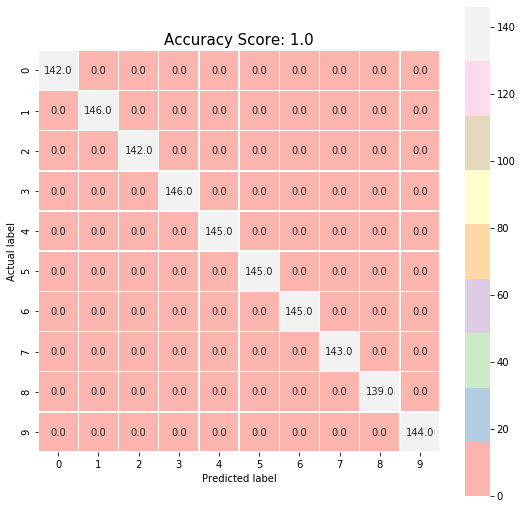

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


**Method 2 (Matplotlib)**

This method is clearly a lot more code. I just wanted to show people how to do it in matplotlib as well. 

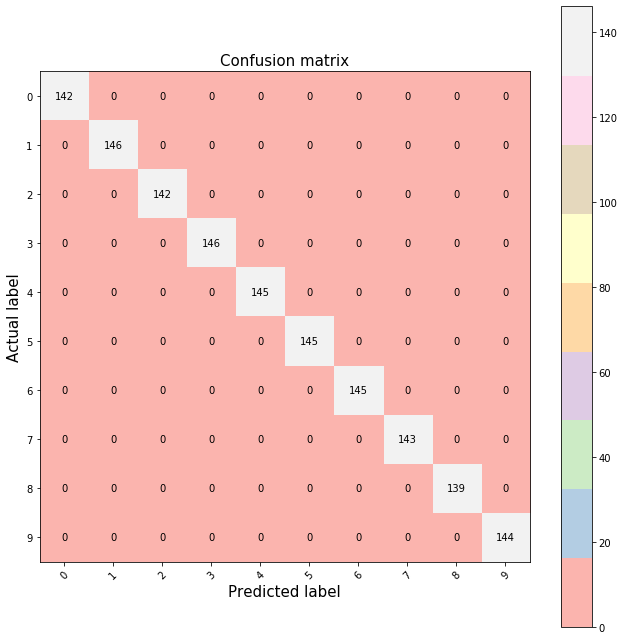

In [47]:
cm = metrics.confusion_matrix(y_train, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')
#plt.show()

[youtube video for this lecture](https://www.youtube.com/watch?v=71iXeuKFcQM)

## Coefficients of Logistic Regression

In [66]:
np.set_printoptions(precision= 5, suppress= False)


In [72]:
logisticRegr.coef_.shape

(10, 64)

In [69]:
logisticRegr.intercept_

array([-0.00327, -0.19795, -0.01541,  0.0405 ,  0.15558, -0.0264 ,
       -0.05845,  0.05527,  0.14264, -0.09251])

## This looks like too good to be true?

In [23]:
from sklearn.model_selection import cross_validate

Let's take a look at how cross_validation works one more time. 

[Sklearn Cross_Validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

[Sklearn Cross Validation User Guide](https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation)

In [24]:
log_reg = LogisticRegression(penalty = 'l1', max_iter= 10000, multi_class= 'auto', C = 0.01, solver = 'liblinear')

cv = cross_validate(log_reg, x_train, y = y_train, cv = 5, return_train_score= True)

In [25]:
training_scores_mean =cv['train_score'].mean()

training_scores_std = cv['train_score'].std()

validation_scores_mean = cv['test_score'].mean()

validation_scores_std = cv['test_score'].std()

Let's report our cross-validation results.

In [26]:
print('5 fold training score {} +/- {} '.format(training_scores_mean, training_scores_std))

print('5 fold validation score {} +/- {} '.format(validation_scores_mean, validation_scores_std))

5 fold training score 0.9420668255950353 +/- 0.0026141596503830348 
5 fold validation score 0.9269066976384049 +/- 0.0145426833213708 


Note that we have some differences between our training scores and validation score. 

So what should we expect in our test case?

## Further work:

Find the best parameters for:

penalty: ['l1' , 'l2']

C (regularization): [0.01, 0.1, 1, 10, 100]

solver = ['sag', 'newton-cg', 'liblinear']

## Exit Ticket

[Exit Ticket](https://forms.gle/LpYikHi63LvfQEpv9)